In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_ABS.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.042424,#VALUE!,#VALUE!,0.492825,0.592149,0.576450,0.738316,0.411216,0.554485,0.367785,0.483998,0.296604,0.406063,0.181587,0.370326,0.323947,0.773659,4
1,1997-02-28 00:00:00,0.030303,#VALUE!,#VALUE!,0.578927,0.558017,0.514660,0.624385,0.395695,0.415181,0.289185,0.404881,0.278218,0.374875,0.161709,0.338374,0.319785,0.783264,4
2,1997-03-31 00:00:00,0.000000,#VALUE!,#VALUE!,0.580438,0.872439,0.375946,0.569335,0.390152,0.488696,0.212427,0.369817,0.252937,0.376553,0.251378,0.443947,0.315132,0.745390,4
3,1997-04-30 00:00:00,0.024242,#VALUE!,#VALUE!,0.344789,0.347304,0.305958,0.347329,0.290743,0.310726,0.209971,0.260192,0.252681,0.305611,0.243253,0.382426,0.277057,0.639667,4
4,1997-05-31 00:00:00,0.042424,#VALUE!,#VALUE!,0.246601,0.439709,0.341267,0.257878,0.232354,0.301562,0.217954,0.296403,0.299157,0.361117,0.265888,0.431798,0.222821,0.677654,4


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,277.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.384531,0.496887,0.499424,0.470617,0.492462,0.480718,0.500017,0.489680,0.492247,0.481544,0.484984,0.495937,0.532766,2.55914
std,0.255453,0.250317,0.183671,0.252012,0.194628,0.242491,0.212772,0.246996,0.213931,0.244801,0.213747,0.269899,0.216243,1.08418
min,0.000000,0.000000,0.000000,-0.581118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.181818,0.375000,0.375000,0.377956,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.424237,2.00000
50%,0.327273,0.502995,0.487146,0.472931,0.492441,0.471254,0.507368,0.490169,0.499027,0.496155,0.491617,0.549094,0.549190,3.00000
75%,0.509091,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.707061,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               221 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 80th percentile (top 20%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 80th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.80) # every data point over the 80th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.509090909


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,0.618182,0.609029,0.507996,0.627675,0.505855,0.645473,0.504849,0.641143,0.493163,0.568362,0.435290,0.634338,0.500191,2.045455
std,0.116929,0.279095,0.158321,0.238003,0.172285,0.234205,0.184584,0.243424,0.192736,0.196403,0.200512,0.192104,0.199407,1.140268
min,0.515152,0.000000,0.203199,0.000000,0.047883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003673,0.030134,1.000000
25%,0.543939,0.431431,0.388822,0.526792,0.394925,0.547091,0.392694,0.546157,0.423411,0.497461,0.299771,0.551665,0.371459,1.000000
50%,0.572727,0.594735,0.512742,0.669900,0.534602,0.639661,0.516182,0.636874,0.497683,0.613175,0.449093,0.649547,0.506743,2.000000
75%,0.677273,0.845523,0.624330,0.748614,0.614946,0.770533,0.591751,0.817735,0.551122,0.677779,0.539403,0.700171,0.569116,3.000000
max,0.987879,1.000000,0.844141,1.000000,0.793388,1.000000,0.893224,1.000000,0.911122,0.979469,0.804748,1.000000,0.879829,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  44.0  0.618182  0.116929  0.017628   
 1  Excess Return % 3-mo (Treasury)  44.0  0.609029  0.279095  0.042075   
 2                         combined  88.0  0.613606  0.212787  0.022683   
 
    95% Conf.  Interval  
 0   0.582632  0.653732  
 1   0.524177  0.693882  
 2   0.568520  0.658691  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.0092
 1                              Degrees of freedom =   86.0000
 2                                               t =    0.2006
 3                           Two side test p value =    0.8415
 4                          Difference < 0 p value =    0.5793
 5                          Difference > 0 p value =    0.4207
 6                                       Cohen's d =    0.0428
 7                                       Hedge's g =    0.0424
 8                        

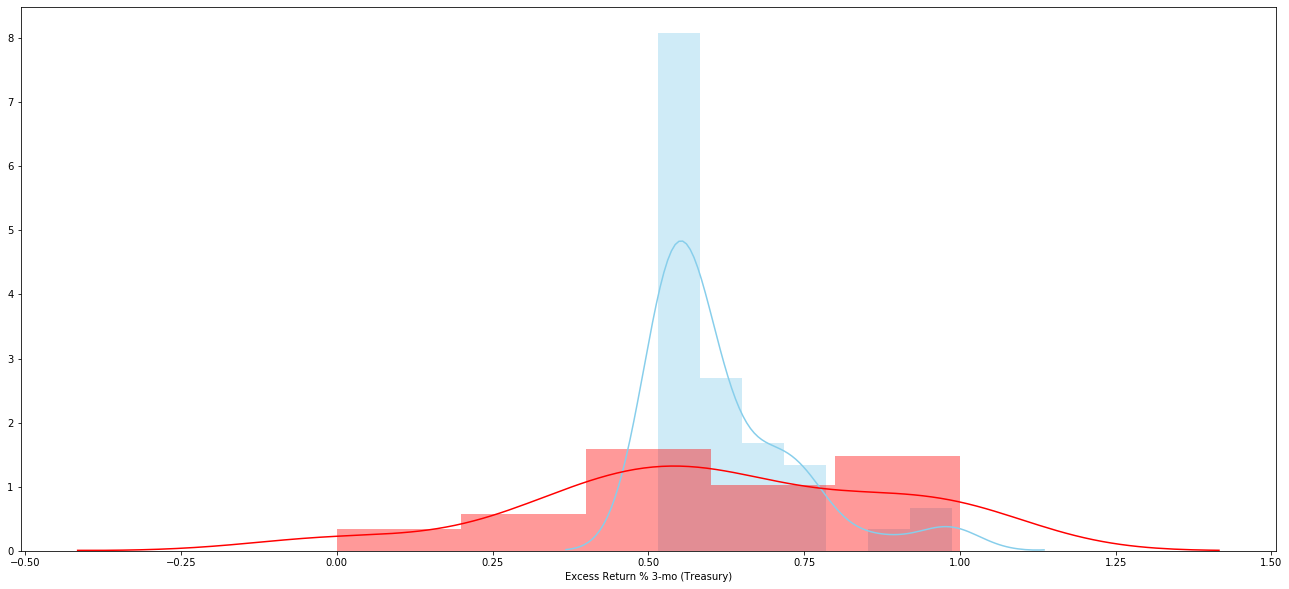

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  44.0  0.618182  0.116929  0.017628   0.582632   
 1  Excess Return % 3-mo (Agg)  44.0  0.507996  0.158321  0.023868   0.459862   
 2                    combined  88.0  0.563089  0.149052  0.015889   0.531508   
 
    Interval  
 0  0.653732  
 1  0.556130  
 2  0.594670  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.1102
 1                             Degrees of freedom =   86.0000
 2                                              t =    3.7135
 3                          Two side test p value =    0.0004
 4                         Difference < 0 p value =    0.9998
 5                         Difference > 0 p value =    0.0002
 6                                      Cohen's d =    0.7917
 7                                      Hedge's g =    0.7848
 8                                  Glass's delta =    

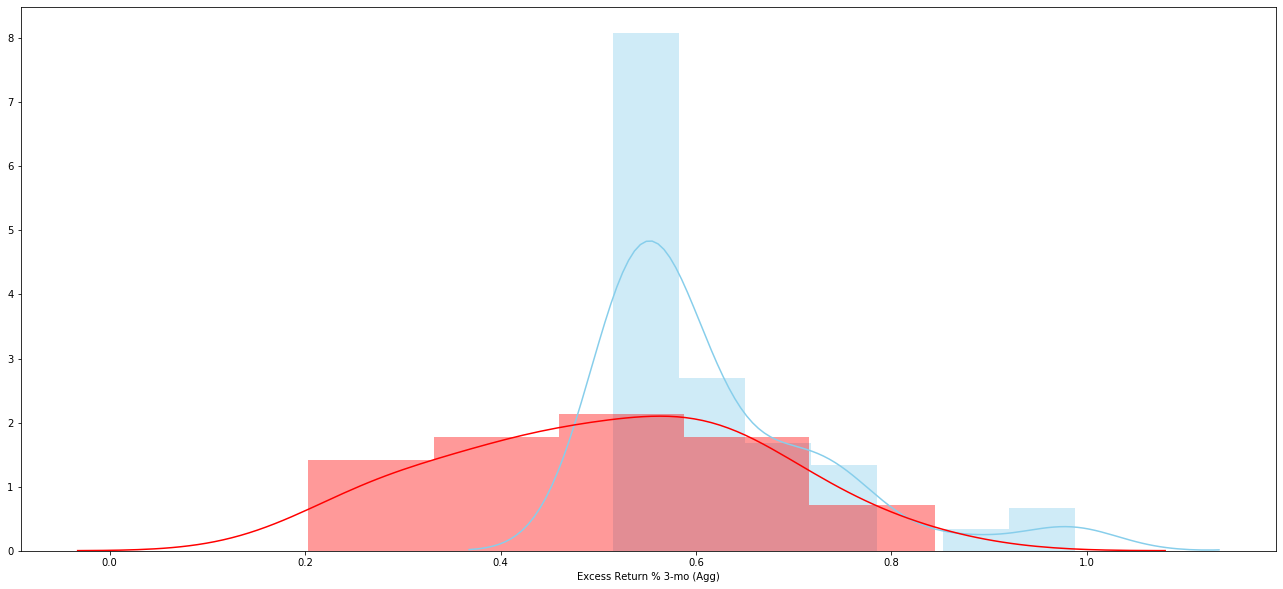

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  44.0  0.618182  0.116929  0.017628   
 1  Excess Return % 6-mo (Treasury)  44.0  0.627675  0.238003  0.035880   
 2                         combined  88.0  0.622928  0.186488  0.019880   
 
    95% Conf.  Interval  
 0   0.582632  0.653732  
 1   0.555316  0.700035  
 2   0.583415  0.662441  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...  -0.0095
 1                              Degrees of freedom =   86.0000
 2                                               t =   -0.2375
 3                           Two side test p value =    0.8129
 4                          Difference < 0 p value =    0.4064
 5                          Difference > 0 p value =    0.5936
 6                                       Cohen's d =   -0.0506
 7                                       Hedge's g =   -0.0502
 8                        

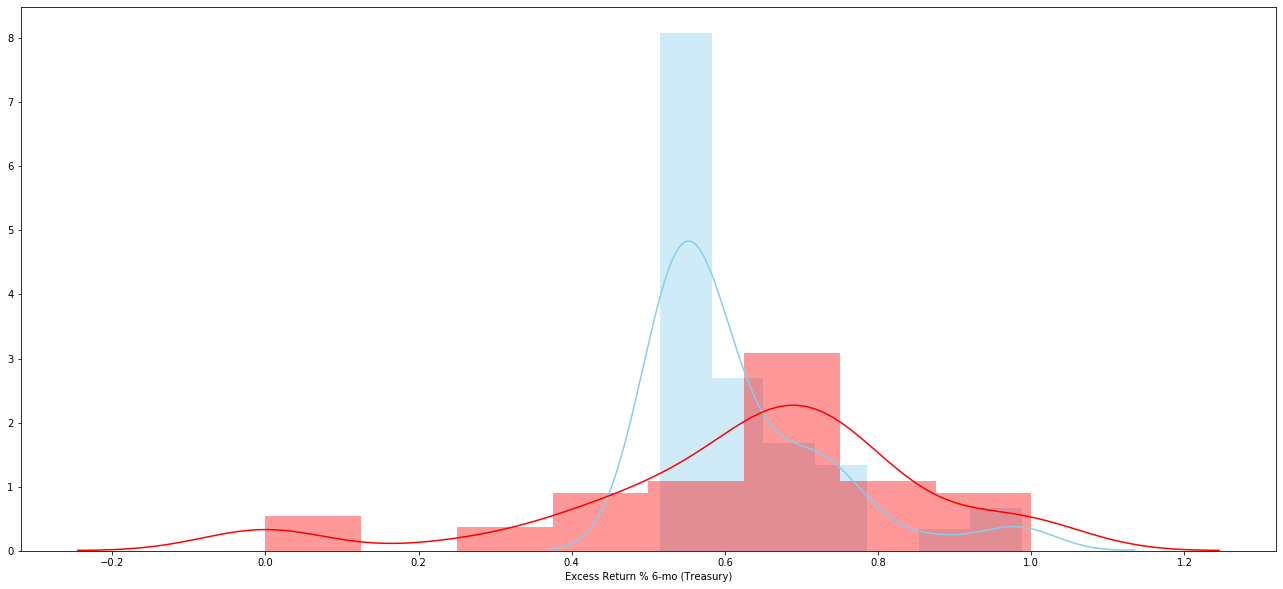

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  44.0  0.618182  0.116929  0.017628   0.582632   
 1  Excess Return % 6-mo (Agg)  44.0  0.505855  0.172285  0.025973   0.453476   
 2                    combined  88.0  0.562019  0.156903  0.016726   0.528774   
 
    Interval  
 0  0.653732  
 1  0.558235  
 2  0.595263  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.1123
 1                             Degrees of freedom =   86.0000
 2                                              t =    3.5784
 3                          Two side test p value =    0.0006
 4                         Difference < 0 p value =    0.9997
 5                         Difference > 0 p value =    0.0003
 6                                      Cohen's d =    0.7629
 7                                      Hedge's g =    0.7562
 8                                  Glass's delta =    

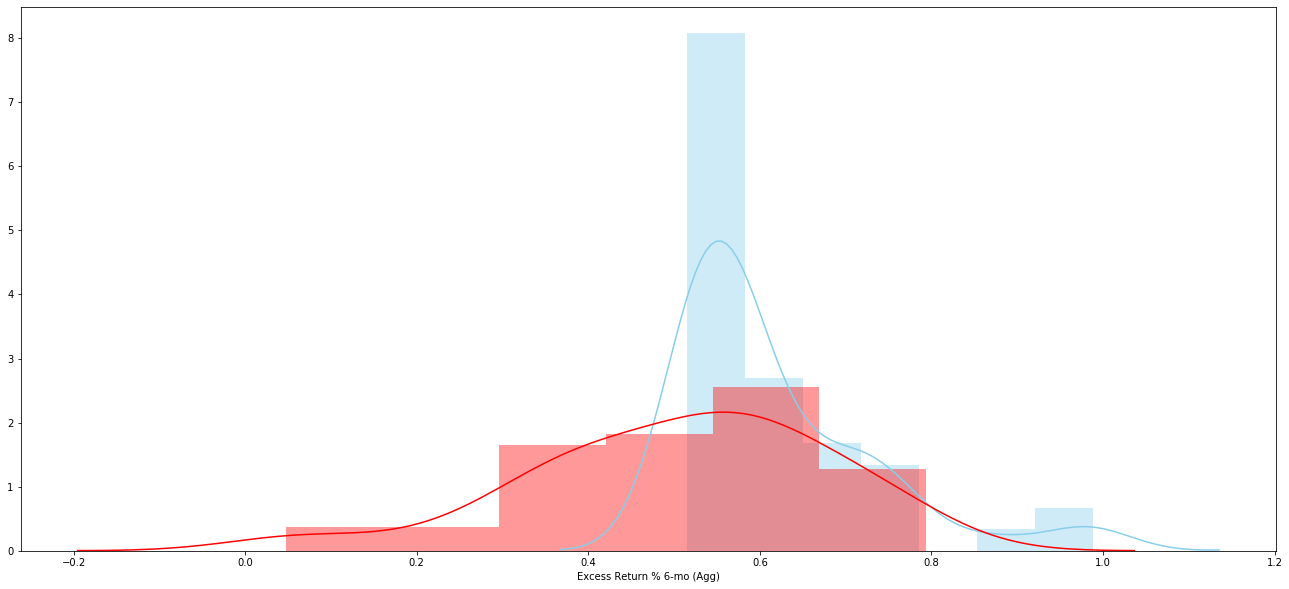

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  44.0  0.618182  0.116929  0.017628   
 1  Excess Return % 9-mo (Treasury)  44.0  0.645473  0.234205  0.035308   
 2                         combined  88.0  0.631827  0.184545  0.019673   
 
    95% Conf.  Interval  
 0   0.582632  0.653732  
 1   0.574268  0.716677  
 2   0.592726  0.670928  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...  -0.0273
 1                              Degrees of freedom =   86.0000
 2                                               t =   -0.6915
 3                           Two side test p value =    0.4911
 4                          Difference < 0 p value =    0.2455
 5                          Difference > 0 p value =    0.7545
 6                                       Cohen's d =   -0.1474
 7                                       Hedge's g =   -0.1461
 8                        

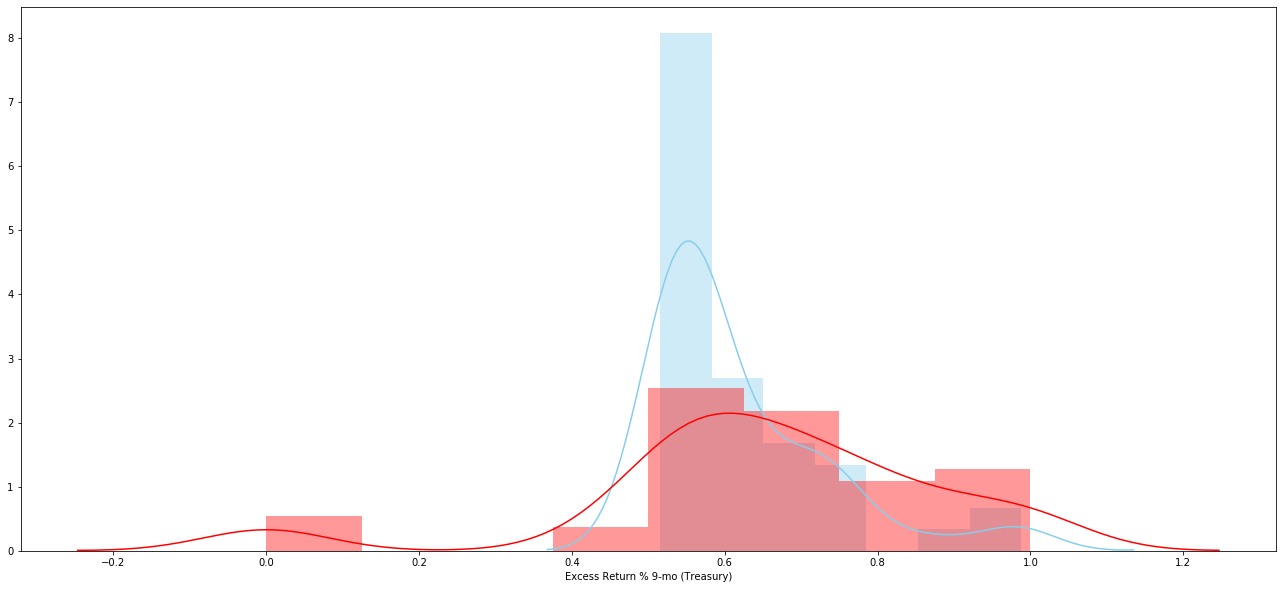

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  44.0  0.618182  0.116929  0.017628   0.582632   
 1  Excess Return % 9-mo (Agg)  44.0  0.504849  0.184584  0.027827   0.448730   
 2                    combined  88.0  0.561515  0.163846  0.017466   0.526800   
 
    Interval  
 0  0.653732  
 1  0.560967  
 2  0.596231  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.1133
 1                             Degrees of freedom =   86.0000
 2                                              t =    3.4405
 3                          Two side test p value =    0.0009
 4                         Difference < 0 p value =    0.9996
 5                         Difference > 0 p value =    0.0004
 6                                      Cohen's d =    0.7335
 7                                      Hedge's g =    0.7271
 8                                  Glass's delta =    

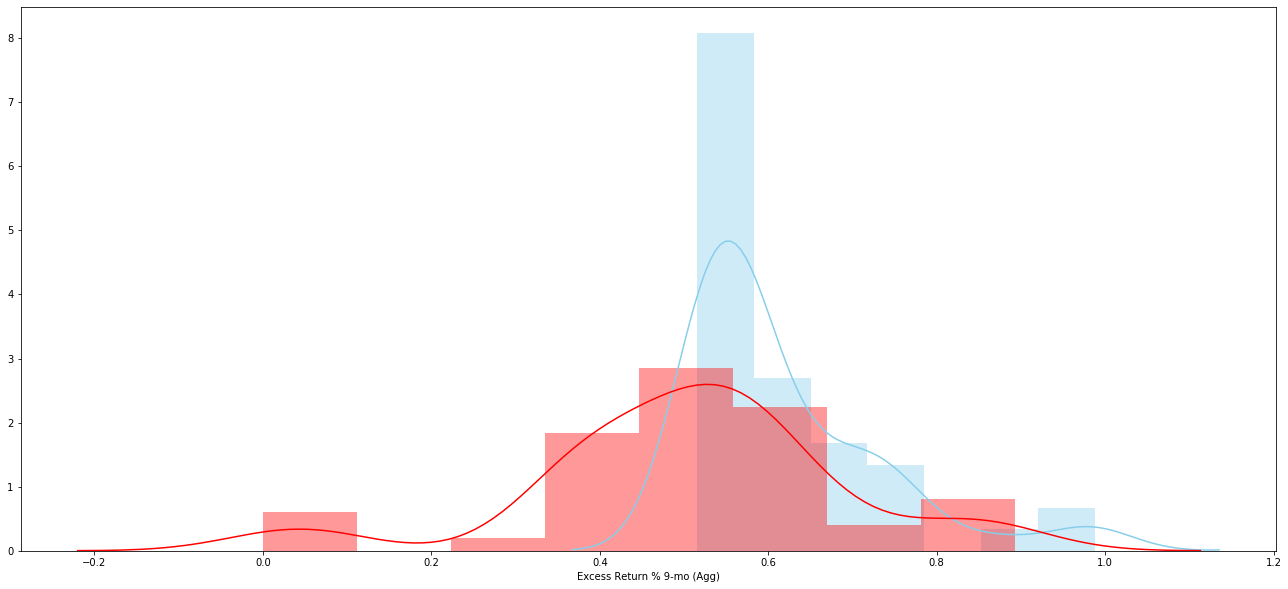

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  44.0  0.618182  0.116929  0.017628   
 1  Excess Return % 12-mo (Treasury)  44.0  0.641143  0.243424  0.036698   
 2                          combined  88.0  0.629662  0.190205  0.020276   
 
    95% Conf.  Interval  
 0   0.582632  0.653732  
 1   0.567135  0.715151  
 2   0.589362  0.669963  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...  -0.0230
 1                              Degrees of freedom =   86.0000
 2                                               t =   -0.5640
 3                           Two side test p value =    0.5742
 4                          Difference < 0 p value =    0.2871
 5                          Difference > 0 p value =    0.7129
 6                                       Cohen's d =   -0.1202
 7                                       Hedge's g =   -0.1192
 8                    

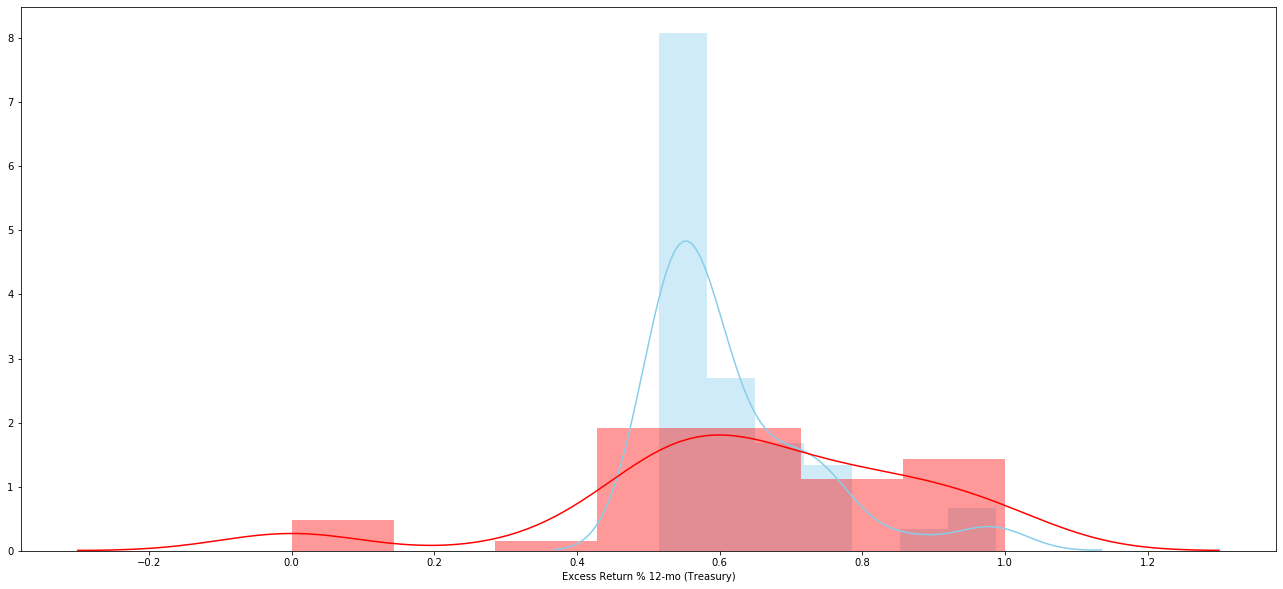

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  44.0  0.618182  0.116929  0.017628   0.582632   
 1  Excess Return % 12-mo (Agg)  44.0  0.493163  0.192736  0.029056   0.434566   
 2                     combined  88.0  0.555672  0.170500  0.018175   0.519547   
 
    Interval  
 0  0.653732  
 1  0.551760  
 2  0.591798  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.1250
 1                              Degrees of freedom =   86.0000
 2                                               t =    3.6786
 3                           Two side test p value =    0.0004
 4                          Difference < 0 p value =    0.9998
 5                          Difference > 0 p value =    0.0002
 6                                       Cohen's d =    0.7843
 7                                       Hedge's g =    0.7774
 8                                   Glass

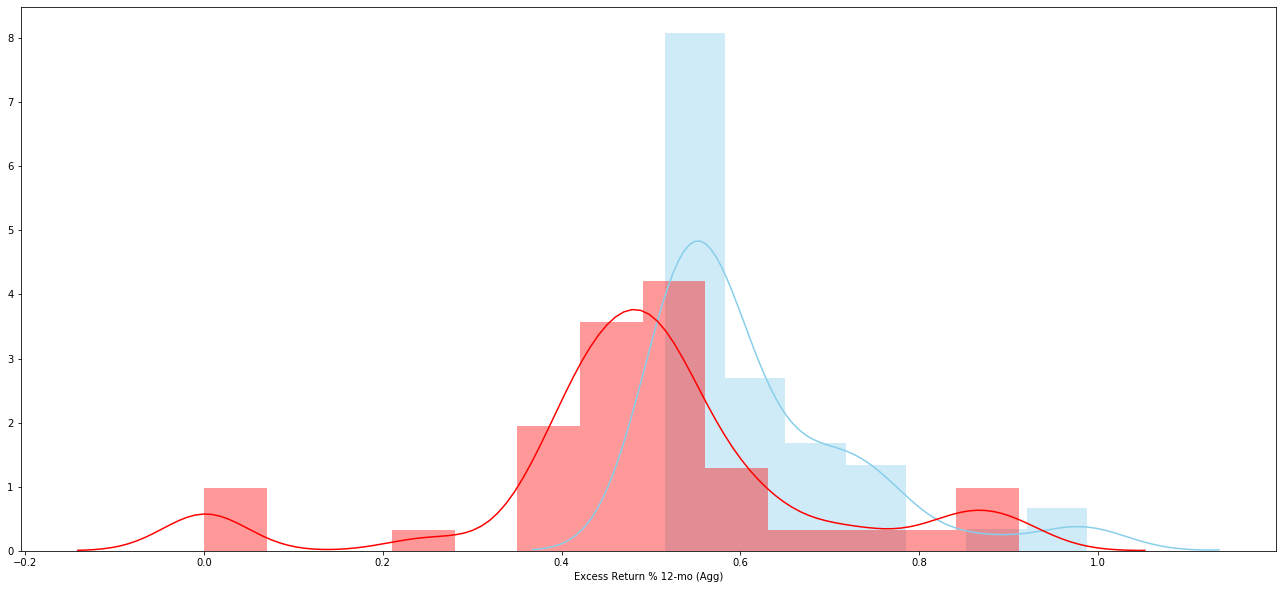

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  44.0  0.618182  0.116929  0.017628   
 1  Excess Return % 24-mo (Treasury)  44.0  0.568362  0.196403  0.029609   
 2                          combined  88.0  0.593272  0.162637  0.017337   
 
    95% Conf.  Interval  
 0   0.582632  0.653732  
 1   0.508650  0.628074  
 2   0.558812  0.627731  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.0498
 1                              Degrees of freedom =   86.0000
 2                                               t =    1.4458
 3                           Two side test p value =    0.1519
 4                          Difference < 0 p value =    0.9241
 5                          Difference > 0 p value =    0.0759
 6                                       Cohen's d =    0.3082
 7                                       Hedge's g =    0.3055
 8                    

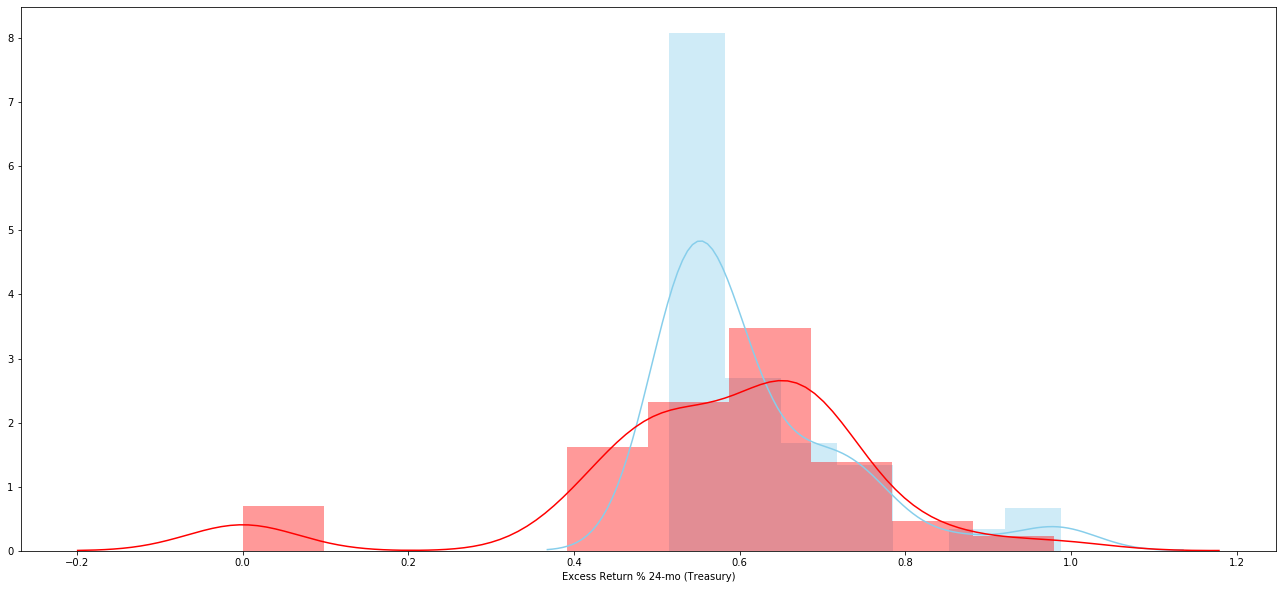

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  44.0  0.618182  0.116929  0.017628   0.582632   
 1  Excess Return % 24-mo (Agg)  44.0  0.435290  0.200512  0.030228   0.374329   
 2                     combined  88.0  0.526736  0.187317  0.019968   0.487047   
 
    Interval  
 0  0.653732  
 1  0.496251  
 2  0.566425  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.1829
 1                              Degrees of freedom =   86.0000
 2                                               t =    5.2266
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.1143
 7                                       Hedge's g =    1.1046
 8                                   Glass

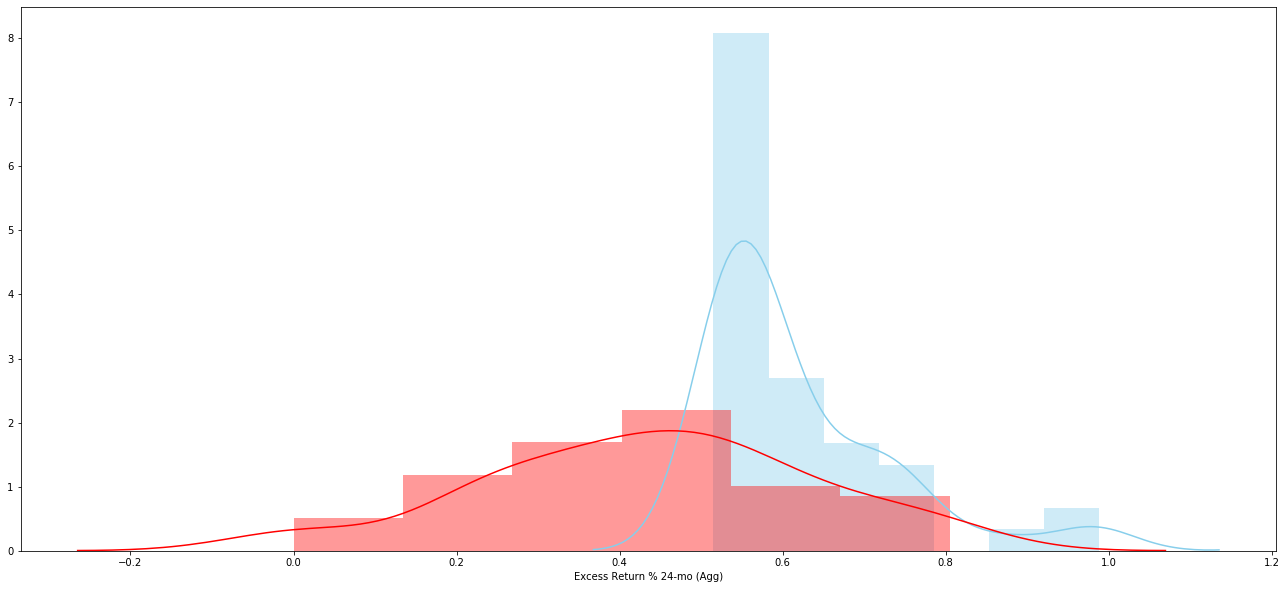

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  44.0  0.618182  0.116929  0.017628   
 1  Excess Return % 36-mo (Treasury)  44.0  0.634338  0.192104  0.028961   
 2                          combined  88.0  0.626260  0.158315  0.016876   
 
    95% Conf.  Interval  
 0   0.582632  0.653732  
 1   0.575933  0.692743  
 2   0.592716  0.659804  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...  -0.0162
 1                              Degrees of freedom =   86.0000
 2                                               t =   -0.4765
 3                           Two side test p value =    0.6349
 4                          Difference < 0 p value =    0.3175
 5                          Difference > 0 p value =    0.6825
 6                                       Cohen's d =   -0.1016
 7                                       Hedge's g =   -0.1007
 8                    

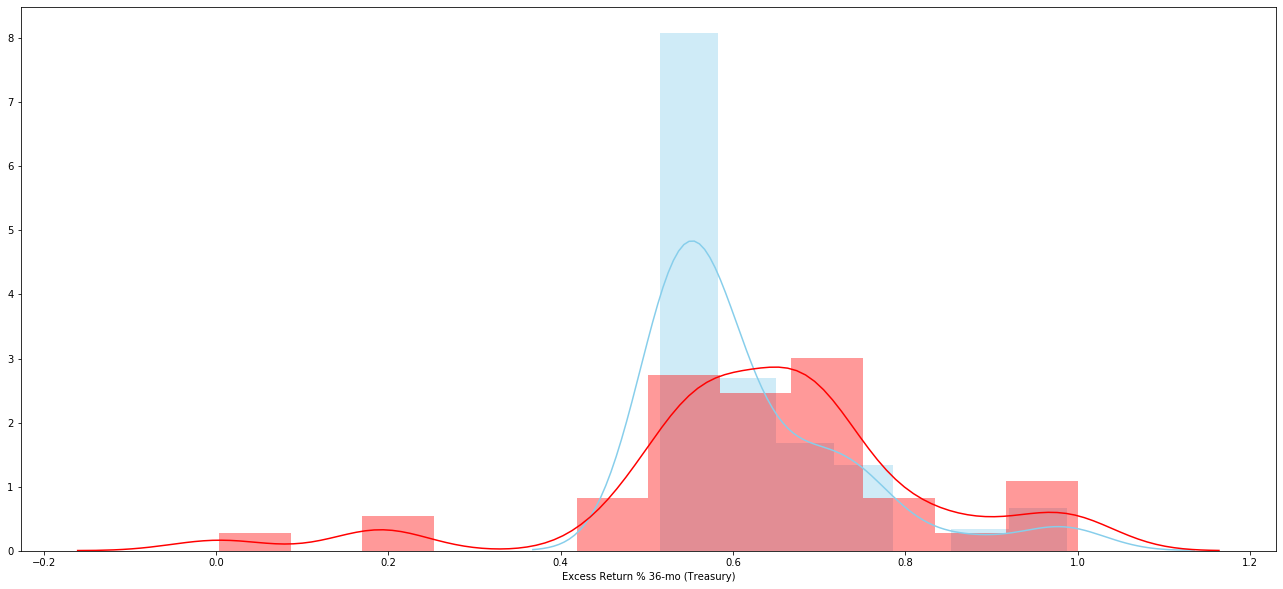

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  44.0  0.618182  0.116929  0.017628   0.582632   
 1  Excess Return % 36-mo (Agg)  44.0  0.500191  0.199407  0.030062   0.439566   
 2                     combined  88.0  0.559187  0.173006  0.018442   0.522530   
 
    Interval  
 0  0.653732  
 1  0.560817  
 2  0.595843  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.1180
 1                              Degrees of freedom =   86.0000
 2                                               t =    3.3858
 3                           Two side test p value =    0.0011
 4                          Difference < 0 p value =    0.9995
 5                          Difference > 0 p value =    0.0005
 6                                       Cohen's d =    0.7218
 7                                       Hedge's g =    0.7155
 8                                   Glass

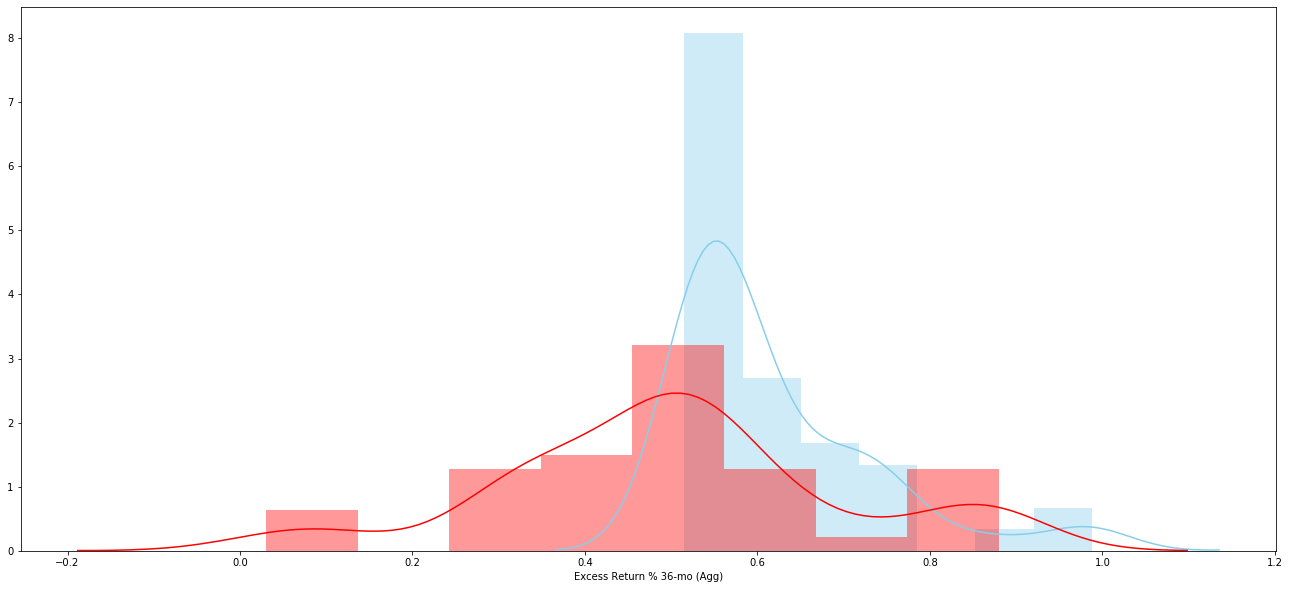

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_ABS.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,277.000000,279.000000,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.384531,0.492726,0.501825,0.496887,0.499424,0.470617,0.492462,0.480718,0.500017,0.489680,0.492247,0.481544,0.484984,0.495937,0.532766,2.55914
std,0.255453,0.250628,0.200742,0.250317,0.183671,0.252012,0.194628,0.242491,0.212772,0.246996,0.213931,0.244801,0.213747,0.269899,0.216243,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.581118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.181818,0.375000,0.375000,0.375000,0.375000,0.377956,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.424237,2.00000
50%,0.327273,0.495846,0.503522,0.502995,0.487146,0.472931,0.492441,0.471254,0.507368,0.490169,0.499027,0.496155,0.491617,0.549094,0.549190,3.00000
75%,0.509091,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.707061,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   44.0  0.618182  0.116929  0.017628   
 1  Excess Return % 3-mo (Treasury)  278.0  0.496887  0.250317  0.015013   
 2                         combined  322.0  0.513462  0.240089  0.013380   
 
    95% Conf.  Interval  
 0   0.582632  0.653732  
 1   0.467333  0.526441  
 2   0.487139  0.539784  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.1213
 1                              Degrees of freedom =   320.0000
 2                                               t =     3.1570
 3                           Two side test p value =     0.0017
 4                          Difference < 0 p value =     0.9991
 5                          Difference > 0 p value =     0.0009
 6                                       Cohen's d =     0.5122
 7                                       Hedge's g =     0.5110
 8           

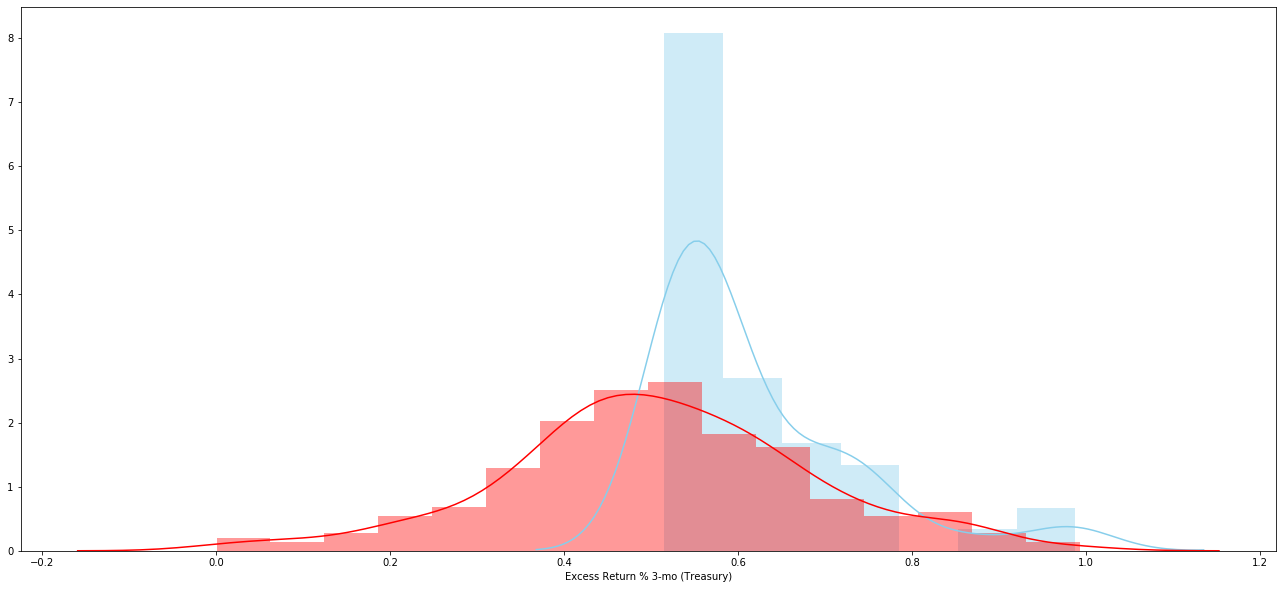

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   44.0  0.618182  0.116929  0.017628   0.582632   
 1  Excess Return % 3-mo (Agg)  278.0  0.499424  0.183671  0.011016   0.477739   
 2                    combined  322.0  0.515652  0.180586  0.010064   0.495853   
 
    Interval  
 0  0.653732  
 1  0.521110  
 2  0.535451  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.1188
 1                             Degrees of freedom =   320.0000
 2                                              t =     4.1546
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     0.6741
 7                                      Hedge's g =     0.6725
 8                                  Glass'

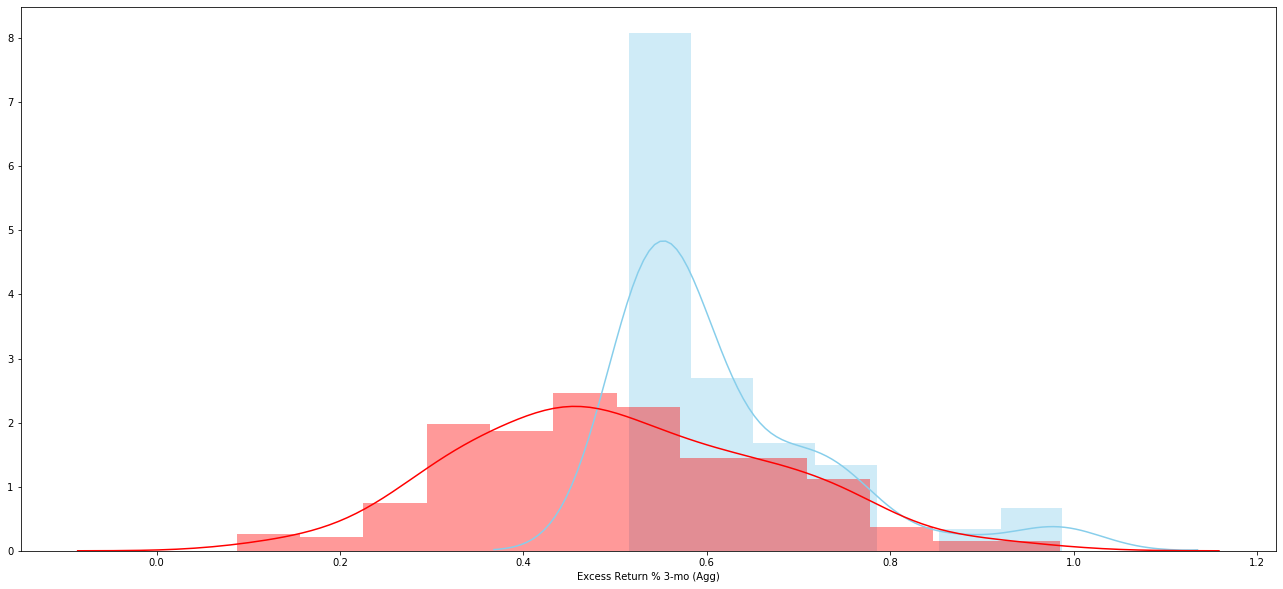

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   44.0  0.618182  0.116929  0.017628   
 1  Excess Return % 6-mo (Treasury)  275.0  0.470617  0.252012  0.015197   
 2                         combined  319.0  0.490971  0.243246  0.013619   
 
    95% Conf.  Interval  
 0   0.582632  0.653732  
 1   0.440700  0.500535  
 2   0.464176  0.517766  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.1476
 1                              Degrees of freedom =   317.0000
 2                                               t =     3.8150
 3                           Two side test p value =     0.0002
 4                          Difference < 0 p value =     0.9999
 5                          Difference > 0 p value =     0.0001
 6                                       Cohen's d =     0.6194
 7                                       Hedge's g =     0.6180
 8           

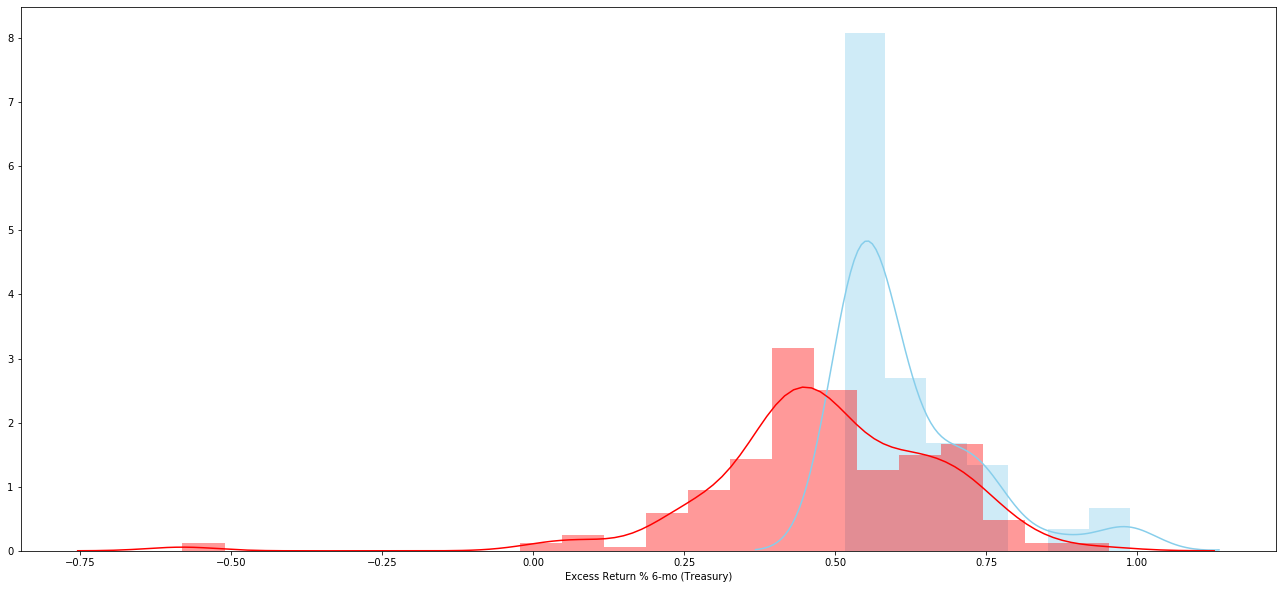

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   44.0  0.618182  0.116929  0.017628   0.582632   
 1  Excess Return % 6-mo (Agg)  275.0  0.492462  0.194628  0.011736   0.469357   
 2                    combined  319.0  0.509802  0.190716  0.010678   0.488794   
 
    Interval  
 0  0.653732  
 1  0.515567  
 2  0.530811  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.1257
 1                             Degrees of freedom =   317.0000
 2                                              t =     4.1628
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     0.6759
 7                                      Hedge's g =     0.6743
 8                                  Glass'

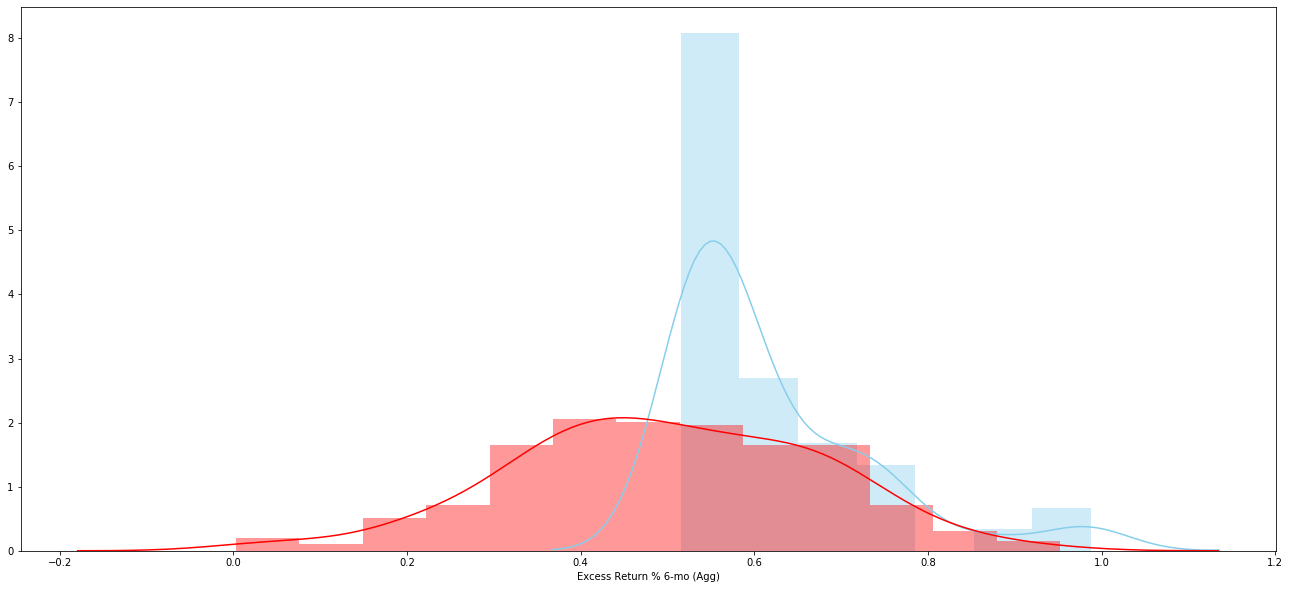

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   44.0  0.618182  0.116929  0.017628   
 1  Excess Return % 9-mo (Treasury)  272.0  0.480718  0.242491  0.014703   
 2                         combined  316.0  0.499859  0.233937  0.013160   
 
    95% Conf.  Interval  
 0   0.582632  0.653732  
 1   0.451771  0.509665  
 2   0.473966  0.525751  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.1375
 1                              Degrees of freedom =   314.0000
 2                                               t =     3.6878
 3                           Two side test p value =     0.0003
 4                          Difference < 0 p value =     0.9999
 5                          Difference > 0 p value =     0.0001
 6                                       Cohen's d =     0.5992
 7                                       Hedge's g =     0.5978
 8           

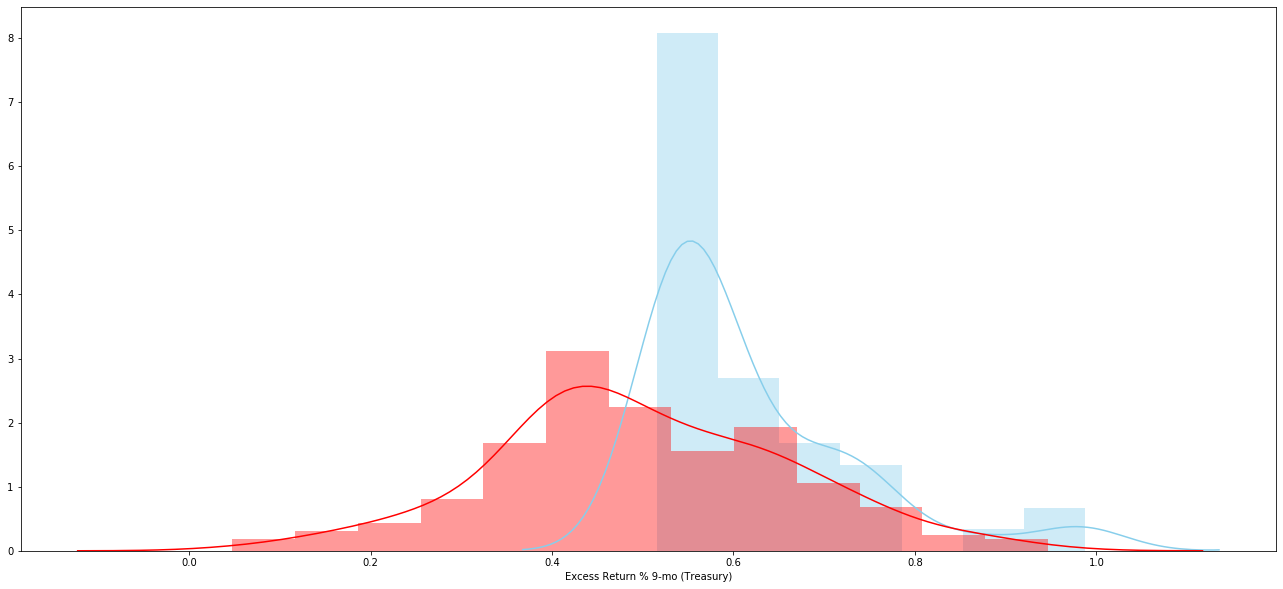

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   44.0  0.618182  0.116929  0.017628   0.582632   
 1  Excess Return % 9-mo (Agg)  272.0  0.500017  0.212772  0.012901   0.474618   
 2                    combined  316.0  0.516470  0.206139  0.011596   0.493655   
 
    Interval  
 0  0.653732  
 1  0.525416  
 2  0.539286  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.1182
 1                             Degrees of freedom =   314.0000
 2                                              t =     3.5938
 3                          Two side test p value =     0.0004
 4                         Difference < 0 p value =     0.9998
 5                         Difference > 0 p value =     0.0002
 6                                      Cohen's d =     0.5840
 7                                      Hedge's g =     0.5826
 8                                  Glass'

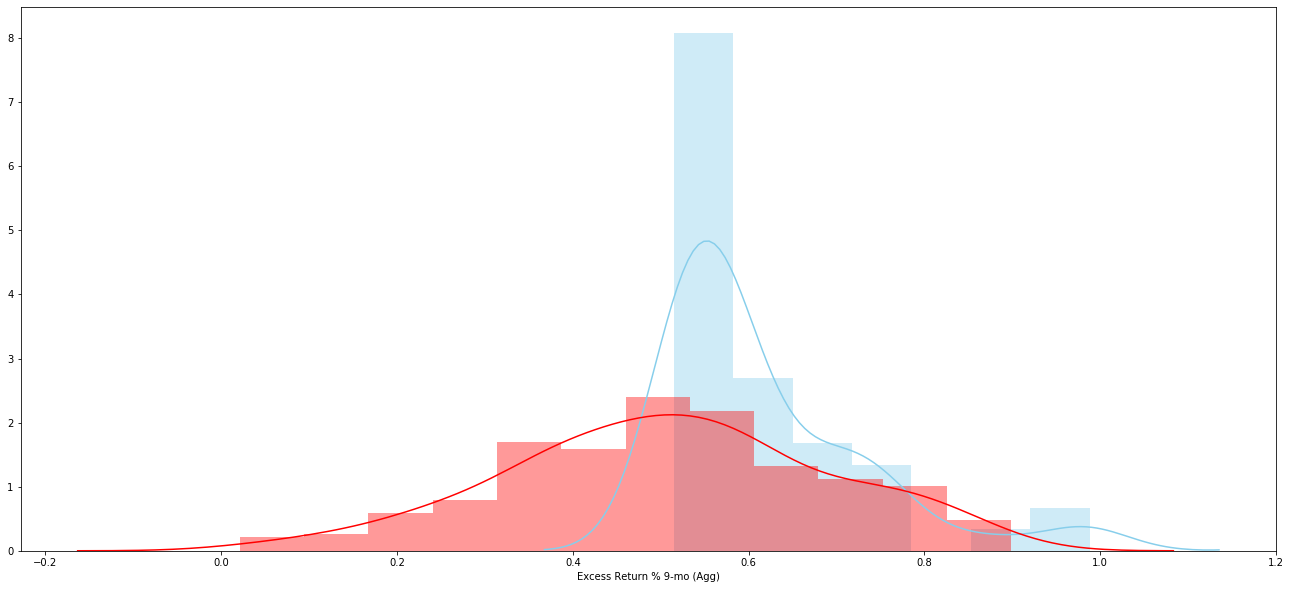

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   44.0  0.618182  0.116929  0.017628   
 1  Excess Return % 12-mo (Treasury)  269.0  0.489680  0.246996  0.015060   
 2                          combined  313.0  0.507744  0.237253  0.013410   
 
    95% Conf.  Interval  
 0   0.582632  0.653732  
 1   0.460029  0.519330  
 2   0.481358  0.534130  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.1285
 1                              Degrees of freedom =   311.0000
 2                                               t =     3.3860
 3                           Two side test p value =     0.0008
 4                          Difference < 0 p value =     0.9996
 5                          Difference > 0 p value =     0.0004
 6                                       Cohen's d =     0.5506
 7                                       Hedge's g =     0.5493
 8       

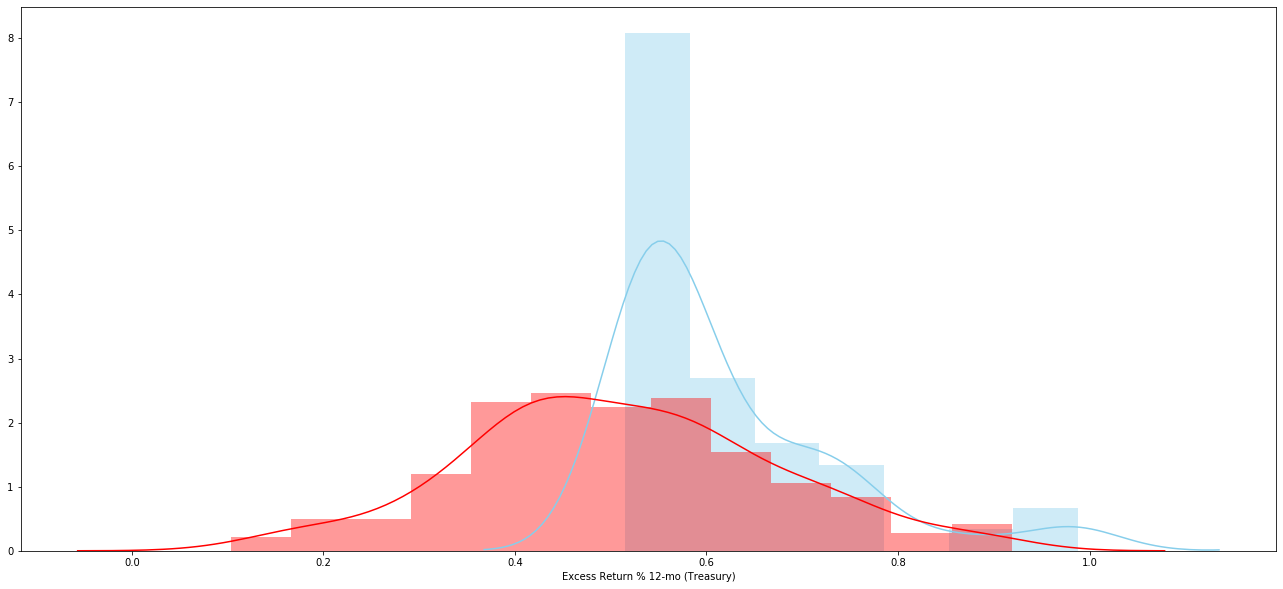

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   44.0  0.618182  0.116929  0.017628   
 1  Excess Return % 12-mo (Agg)  269.0  0.492247  0.213931  0.013044   
 2                     combined  313.0  0.509950  0.207651  0.011737   
 
    95% Conf.  Interval  
 0   0.582632  0.653732  
 1   0.466566  0.517928  
 2   0.486856  0.533044  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.1259
 1                              Degrees of freedom =   311.0000
 2                                               t =     3.8093
 3                           Two side test p value =     0.0002
 4                          Difference < 0 p value =     0.9999
 5                          Difference > 0 p value =     0.0001
 6                                       Cohen's d =     0.6195
 7                                       Hedge's g =     0.6180
 8                           

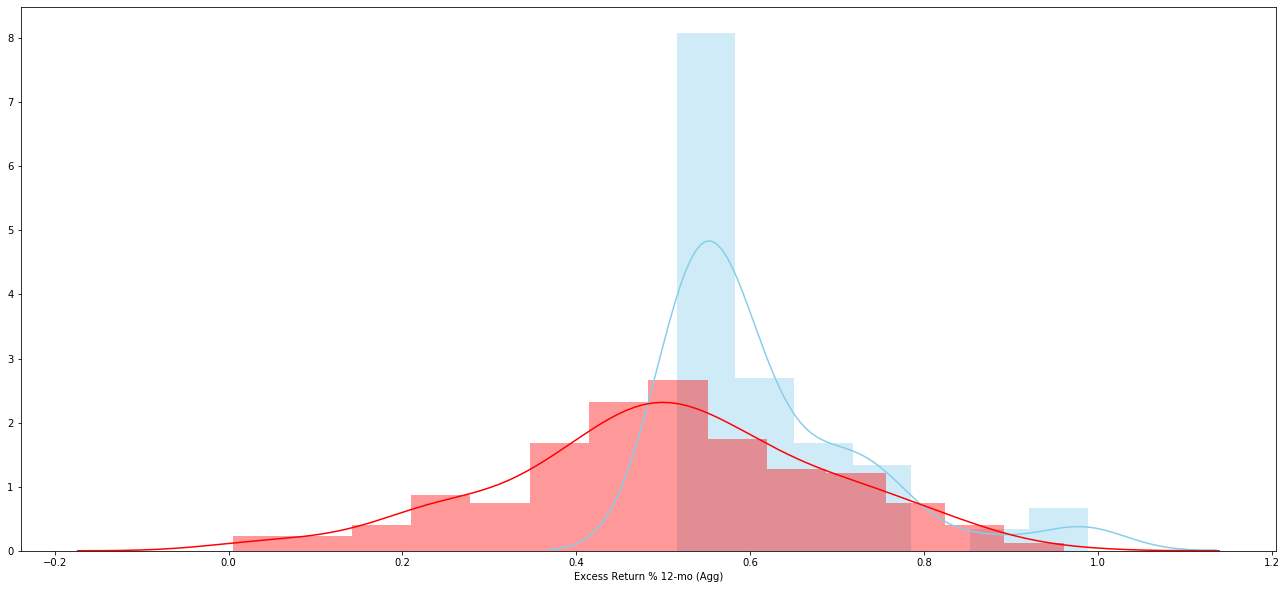

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   44.0  0.618182  0.116929  0.017628   
 1  Excess Return % 24-mo (Treasury)  257.0  0.481544  0.244801  0.015270   
 2                          combined  301.0  0.501518  0.235448  0.013571   
 
    95% Conf.  Interval  
 0   0.582632  0.653732  
 1   0.451473  0.511615  
 2   0.474811  0.528224  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.1366
 1                              Degrees of freedom =   299.0000
 2                                               t =     3.6284
 3                           Two side test p value =     0.0003
 4                          Difference < 0 p value =     0.9998
 5                          Difference > 0 p value =     0.0002
 6                                       Cohen's d =     0.5920
 7                                       Hedge's g =     0.5905
 8       

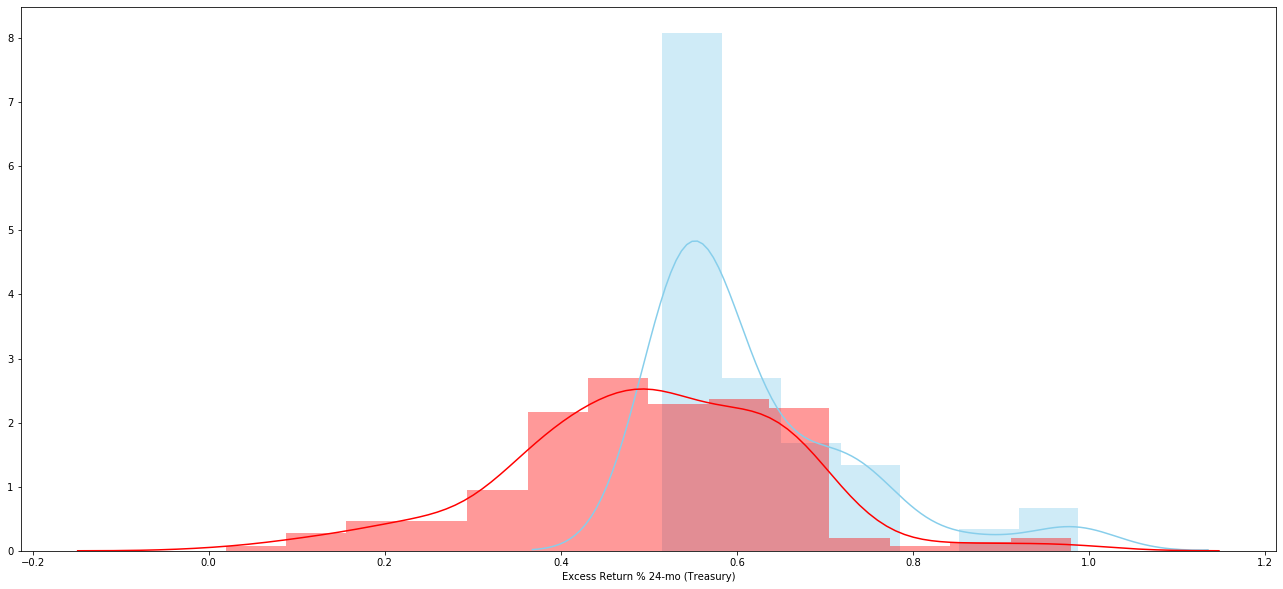

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   44.0  0.618182  0.116929  0.017628   
 1  Excess Return % 24-mo (Agg)  257.0  0.484984  0.213747  0.013333   
 2                     combined  301.0  0.504455  0.207770  0.011976   
 
    95% Conf.  Interval  
 0   0.582632  0.653732  
 1   0.458727  0.511241  
 2   0.480888  0.528022  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.1332
 1                              Degrees of freedom =   299.0000
 2                                               t =     4.0278
 3                           Two side test p value =     0.0001
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.6571
 7                                       Hedge's g =     0.6555
 8                           

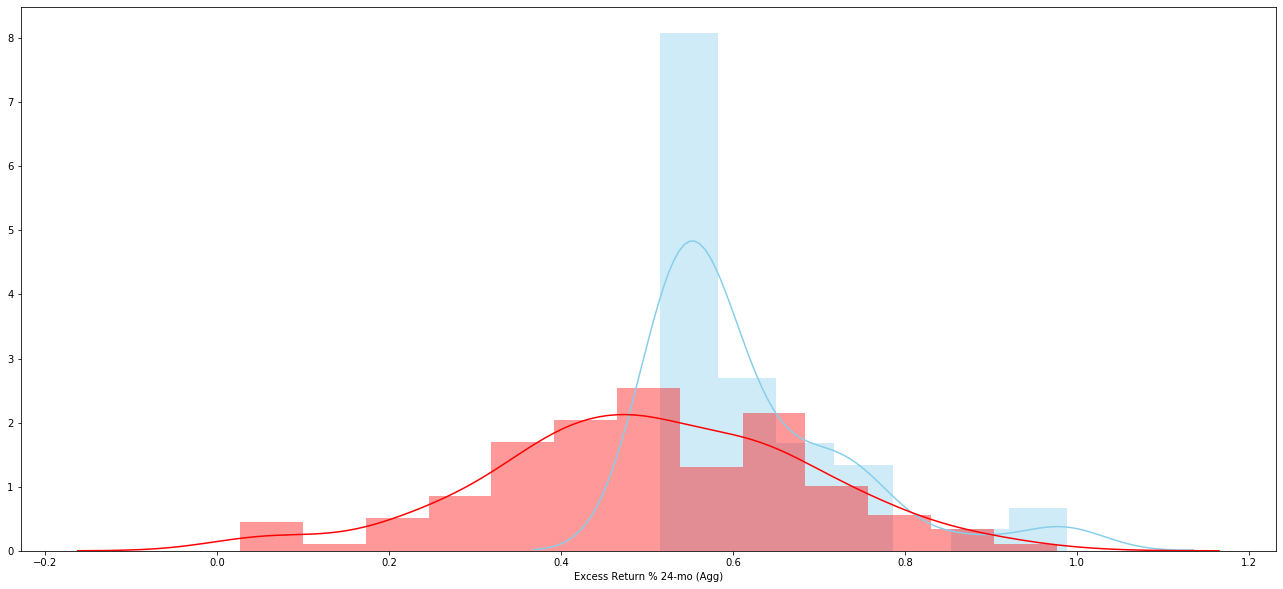

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   44.0  0.618182  0.116929  0.017628   
 1  Excess Return % 36-mo (Treasury)  245.0  0.495937  0.269899  0.017243   
 2                          combined  289.0  0.514549  0.256307  0.015077   
 
    95% Conf.  Interval  
 0   0.582632  0.653732  
 1   0.461972  0.529901  
 2   0.484874  0.544223  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.1222
 1                              Degrees of freedom =   287.0000
 2                                               t =     2.9517
 3                           Two side test p value =     0.0034
 4                          Difference < 0 p value =     0.9983
 5                          Difference > 0 p value =     0.0017
 6                                       Cohen's d =     0.4833
 7                                       Hedge's g =     0.4820
 8       

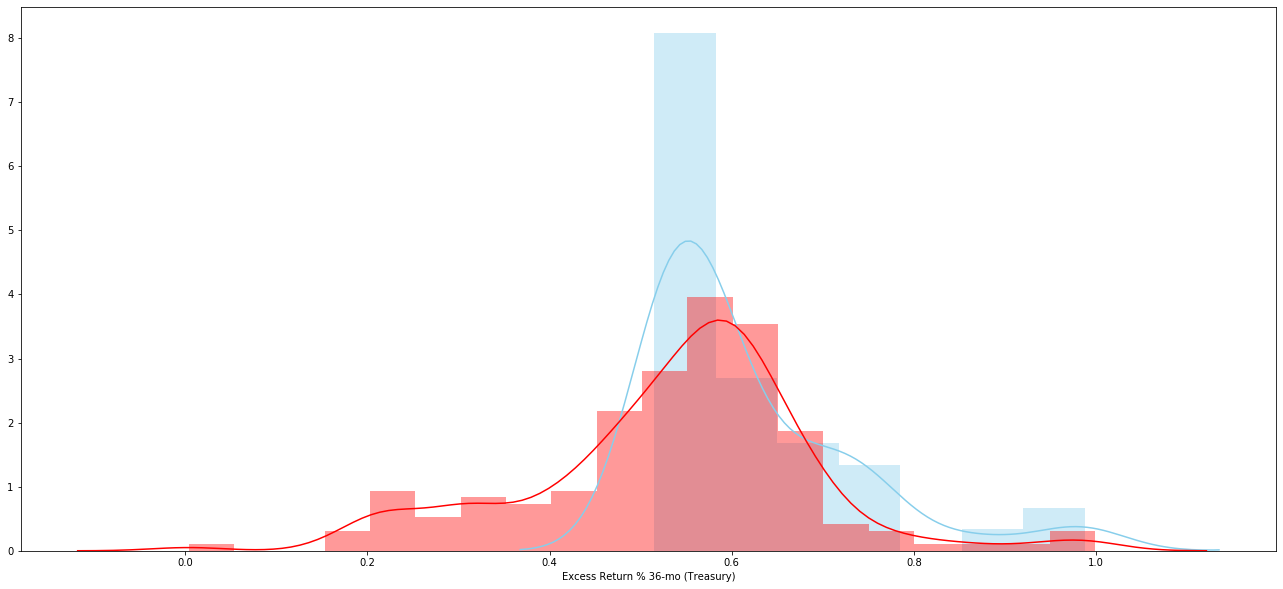

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   44.0  0.618182  0.116929  0.017628   
 1  Excess Return % 36-mo (Agg)  245.0  0.532766  0.216243  0.013815   
 2                     combined  289.0  0.545771  0.206405  0.012141   
 
    95% Conf.  Interval  
 0   0.582632  0.653732  
 1   0.505554  0.559978  
 2   0.521873  0.569668  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.0854
 1                              Degrees of freedom =   287.0000
 2                                               t =     2.5515
 3                           Two side test p value =     0.0112
 4                          Difference < 0 p value =     0.9944
 5                          Difference > 0 p value =     0.0056
 6                                       Cohen's d =     0.4178
 7                                       Hedge's g =     0.4167
 8                           

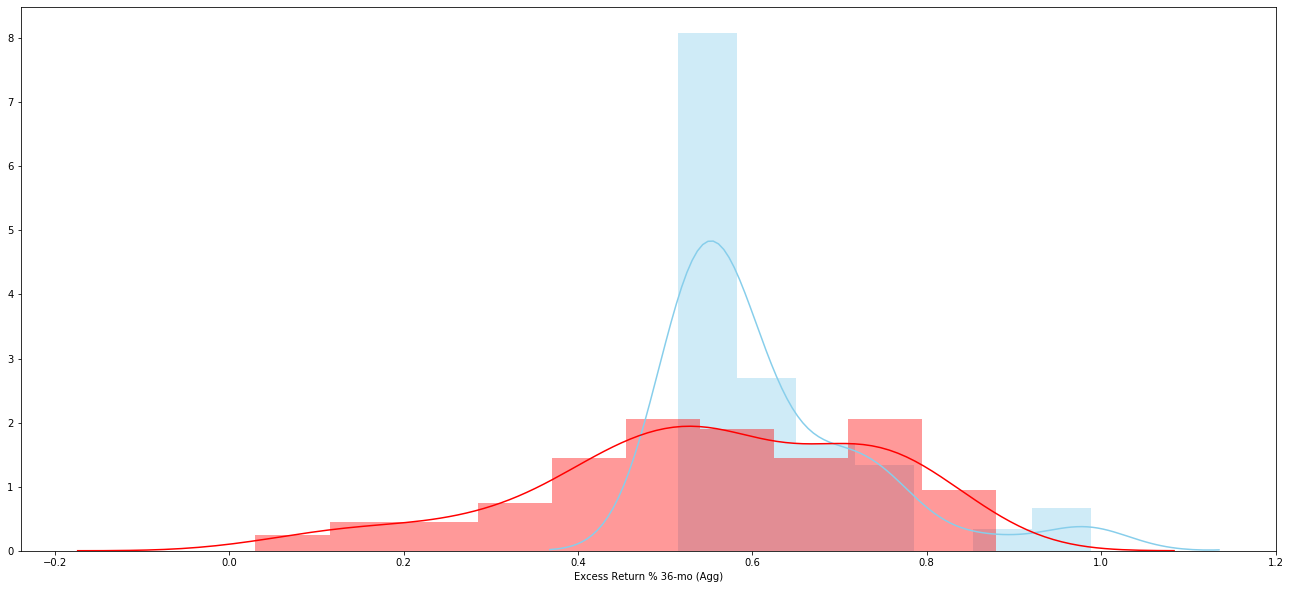

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")